In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import csv
from apyori import apriori

In [3]:
data = pd.read_csv(r'economic_freedom_index2019_data.csv', encoding='ISO-8859-1')

# Eksploracja danych- projekt

## Techniki redukcji wymiarów oraz klasteryzacja i klasyfikacja

Redukcja wymiarów za pomocą Analizy Składowych Głównych (PCA, od ang. Principal Component Analysis) to technika statystyczna stosowana w przetwarzaniu sygnałów i analizie danych, która przekształca oryginalne dane składające się z wielu zmiennych w nowy zestaw niepowiązanych ze sobą zmiennych, nazywanych głównymi składowymi. Proces ten zmniejsza liczbę zmiennych, zachowując przy tym jak najwięcej informacji zawartych w oryginalnym zestawie danych. PCA działa dobrze, gdy dane są rozłożone wokół kilku głównych składowych i są linearnie od siebie odseparowane. Celem PCA jest znalezienie kierunków w przestrzeni danych, w których rozkład danych ma największą wariancję.

Inicjalizacja standardowego skalera, który normalizuje dane tak, aby miały średnią równą 0 i odchylenie standardowe równą 1.

In [4]:
# Wybór zmiennych numerycznych
numerical_data = data.select_dtypes(include=[np.number])

Standardyzacja danych numerycznych, zastępując brakujące wartości (NaN) zerami.

In [5]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(numerical_data.fillna(0))

Inicjalizacja analizy składowych głównych oraz przeprowadzenie PCA na znormalizowanych danych i uzyskanie głównych składowych.

In [6]:
pca = PCA()
principal_components = pca.fit_transform(standardized_data)
print(principal_components)

[[ 3.16115012 -2.25893201  0.40100953 ... -0.03542994  0.0272578
   0.06748617]
 [-1.31934207 -0.61550151 -0.09440718 ... -0.13746587  0.34004764
   0.04376334]
 [ 2.21526592  0.2051415  -0.95948938 ...  0.10312178 -0.12763242
  -0.02259357]
 ...
 [ 4.44994603  3.85429348  3.43421827 ... -0.82257868 -0.29457031
  -0.36969045]
 [ 1.28046198 -0.69420452 -0.68743382 ... -0.33761466 -0.02102257
   0.01512662]
 [ 3.9177836  -0.36605602 -1.8885463  ...  0.00872715  0.17393667
   0.09559233]]


In [7]:
print(principal_components[:2])

[[ 3.16115012 -2.25893201  0.40100953 -1.44567717 -0.4445021   0.52110038
   0.58365131  1.32310979  0.29920401  1.52814267 -0.5910434   1.45411675
   0.96345883  0.01588278  0.01692789  0.59136238 -0.30329839  0.06117741
  -0.44028673  0.2411372  -0.00900286  0.11408205 -0.03542994  0.0272578
   0.06748617]
 [-1.31934207 -0.61550151 -0.09440718 -0.59059376  0.25317512 -0.95449279
   1.9447152  -0.01554955  1.06785053 -0.08662633  0.39792882  0.8155314
   0.06857527 -0.08837917 -0.32574799  0.2593933  -0.74564614  0.14962054
   0.33415032  0.14313677 -0.02036827  0.39343893 -0.13746587  0.34004764
   0.04376334]]


Obliczenie udziału wariancji wyjaśnionej przez każdą składową.

In [8]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[3.33938839e-01 1.14058030e-01 9.07098166e-02 6.69025103e-02
 6.36274743e-02 4.81029673e-02 4.27028730e-02 3.78002913e-02
 3.64186509e-02 2.94192410e-02 2.43371689e-02 2.27931616e-02
 1.53432824e-02 1.31411352e-02 1.13825986e-02 1.04736757e-02
 8.38705776e-03 7.06503916e-03 6.10466984e-03 5.67987521e-03
 3.61124214e-03 3.47482370e-03 3.16439430e-03 1.06192651e-03
 2.99255460e-04]


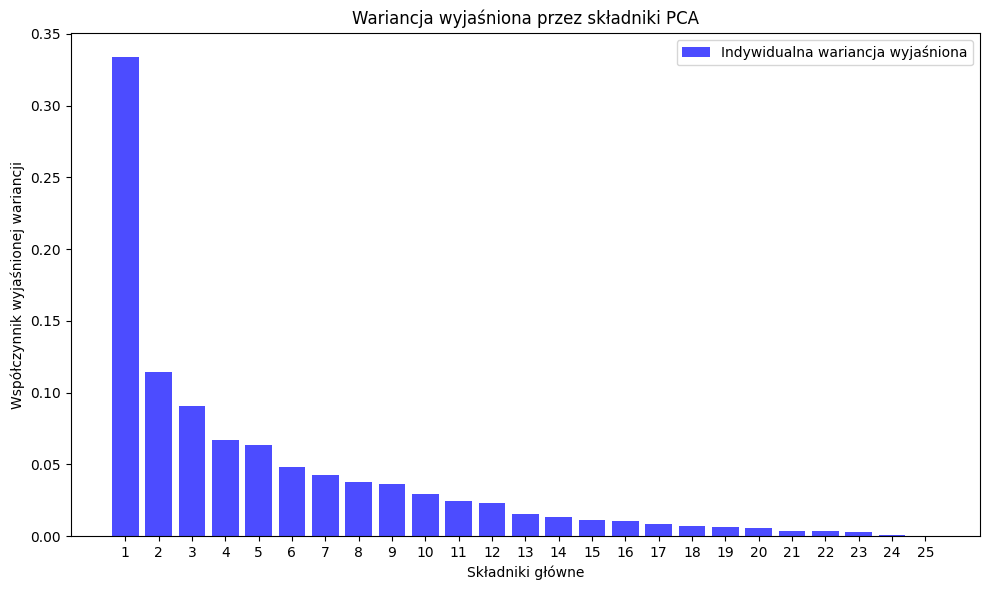

In [9]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='blue', label='Indywidualna wariancja wyjaśniona')
plt.ylabel('Współczynnik wyjaśnionej wariancji')
plt.xlabel('Składniki główne')
plt.title('Wariancja wyjaśniona przez składniki PCA')
plt.xticks(range(1, len(explained_variance) + 1))
plt.legend(loc='best')
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

## Klasteryzacja K-średnich

Popularna metoda analizy skupień (ang. cluster analysis) wykorzystywana w uczeniu maszynowym i statystyce do grupowania danych na podstawie ich cech. Metoda ta dzieli zbiór danych na K grup (klastrów), próbując zminimalizować wewnątrzgrupową wariancję.

Inicjalizacja algorytmu K-średnich z trzema klastrami.

In [10]:
kmeans = KMeans(n_clusters=3)

Stosowanie algorytmu K-średnich do głównych składowych.

In [11]:
clusters = kmeans.fit_predict(principal_components)

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Inicjalizacja kodowania etykiet, w naszym przykładzie jest to 'Region'.

In [12]:
# Kodowanie etykiet dla zmiennej 'Region'
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Region'])

Podział danych na zestawy treningowe i testowe.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(principal_components, y, test_size=0.3, random_state=42)

Utworzenie modelu regresji logistycznej oraz trenowanie modelu na danych treningowych.

In [14]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Użycie modelu do przewidywania etykiet na danych testowych.

In [15]:
y_pred = model.predict(X_test)

Tworzenie raportu klasyfikacji, aby ocenić wydajność modelu.

In [16]:
classification_report_result = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

In [17]:
print(classification_report_result)

                              precision    recall  f1-score   support

                    Americas       0.64      0.50      0.56        14
                Asia-Pacific       0.78      0.70      0.74        10
                      Europe       0.80      1.00      0.89        12
Middle East and North Africa       0.50      0.75      0.60         4
          Sub-Saharan Africa       0.60      0.56      0.58        16

                    accuracy                           0.68        56
                   macro avg       0.66      0.70      0.67        56
                weighted avg       0.68      0.68      0.67        56



In [18]:
labels = ["Americas", "Asia-Pacific", "Europe", "Middle East and North Africa", "Sub-Saharan Africa"]
precision = [0.64, 0.78, 0.80, 0.50, 0.60]
recall = [0.50, 0.70, 1.00, 0.75, 0.56]
f1_score = [0.56, 0.74, 0.89, 0.60, 0.58]

Wykres ten pomaga zobaczyć, jak dużo wariancji jest wyjaśnione przez poszczególne składowe główne, co jest kluczowe w zrozumieniu efektywności PCA w redukcji wymiarowości danych.

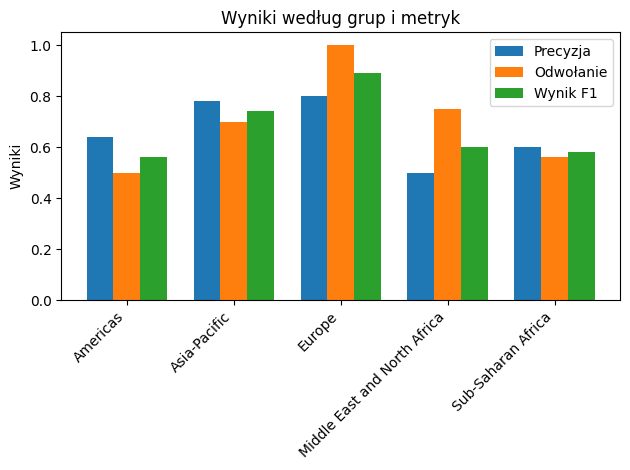

In [19]:
x = np.arange(len(labels))  
width = 0.25  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precyzja')
rects2 = ax.bar(x, recall, width, label='Odwołanie')
rects3 = ax.bar(x + width, f1_score, width, label='Wynik F1')

ax.set_ylabel('Wyniki')
ax.set_title('Wyniki według grup i metryk')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()

## Reguły asocjacyjne

### Apriori

Algorytm wykorzystywany do wykrywania związków między elementami w zbiorze danych. Działa na zasadzie "kombinacji przed selekcją"- generuje kandydatów do związków, a następnie sprawdza ich częstotliwość występowania w danych. Algorytm przeszukuje zbiór danych, tworząc kombinacje elementów i sprawdzając, które z nich występują często jednocześnie. Te, które spełniają określone kryterium częstotliwości, są uznawane za istotne związki i zwracane jako wynik działania algorytmu.

*Czyli np. jak ktoś kupił 2 filmy to może ktoś inny kupił również 2 te same filmy*

Algorytm Apriori stosuje dwa główne kryteria do określania istotności związków między elementami w zbiorze danych: **wsparcie (support)** i **ufność (confidence)**. Te metryki pozwalają zidentyfikować i ocenić siłę związków asocjacyjnych między różnymi przedmiotami w zbiorze danych. Oto szczegółowe opisy tych kryteriów:

**Wsparcie (Support):**
- Wsparcie jest miarą popularności zestawu przedmiotów i jest definiowane jako proporcja transakcji w danych, które zawierają ten zestaw przedmiotów.
- Wskaźnik wsparcia jest podstawą algorytmu Apriori, który polega na idei, że im częściej występuje kombinacja przedmiotów, tym bardziej jest istotna.
- Jest to procentowy udział wszystkich transakcji, które zawierają dany zestaw przedmiotów, w stosunku do całkowitej liczby transakcji.
- Na przykład, jeśli zestaw przedmiotów {chleb, mleko} pojawia się w 100 z 1000 transakcji, wsparcie dla tego zestawu wynosi 10%.

**Ufność (Confidence):**
- Ufność jest miarą niezawodności wygenerowanej reguły asocjacyjnej.
- Definiuje się ją jako stosunek liczby transakcji zawierających wszystkie przedmioty z reguły, do liczby transakcji zawierających tylko przedmioty z lewej strony reguły.
- Innymi słowy, mierzy ona, jak często przedmioty po prawej stronie reguły występują w transakcjach, które zawierają przedmioty po lewej stronie.
- Na przykład, jeśli mamy regułę {chleb} -> {mleko} z ufnością 70%, oznacza to, że 70% transakcji z chlebem zawiera również mleko.

In [20]:
with open("proj1.csv", "r") as f:
    csv_reader = csv.reader(f)
    transactions = list(csv_reader)

rules = apriori(transactions, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)

In [21]:
def prepare_output(results):
    Support, Confidence, Lift, Items, Antecedent, Consequent = [], [], [], [], [], []

    for RelationRecord in results:
        for ordered_stat in RelationRecord.ordered_statistics:
            Support.append(RelationRecord.support)
            Items.append(set(RelationRecord.items))
            Antecedent.append(set(ordered_stat.items_base))
            Consequent.append(set(ordered_stat.items_add))
            Confidence.append(ordered_stat.confidence)
            Lift.append(ordered_stat.lift)

    df = pd.DataFrame({
        'Items': Items,
        'Antecedent': Antecedent,
        'Consequent': Consequent,
        'Support': Support,
        'Confidence': Confidence,
        'Lift': Lift
    })

    return df

In [22]:
results = prepare_output(rules)

sorted_results = results.sort_values("Lift", ascending=False)

print(sorted_results)

                                                 Items  \
548  {MANHATTAN, STREET, SEXUAL ABUSE, COMPLETED, F...   
920  {SEX CRIMES, MANHATTAN, STREET, SEXUAL ABUSE, ...   
925  {SEX CRIMES, MANHATTAN, STREET, SEXUAL ABUSE, ...   
550  {MANHATTAN, STREET, SEXUAL ABUSE, COMPLETED, F...   
922  {SEX CRIMES, MANHATTAN, STREET, SEXUAL ABUSE, ...   
..                                                 ...   
500  {SEX CRIMES, RESIDENCE-HOUSE, SEXUAL ABUSE, BR...   
497  {SEX CRIMES, RESIDENCE-HOUSE, SEXUAL ABUSE, BR...   
676  {SEX CRIMES, RESIDENCE-HOUSE, COMPLETED, STATE...   
679  {SEX CRIMES, RESIDENCE-HOUSE, COMPLETED, STATE...   
239  {RESIDENCE-HOUSE, STATEN ISLAND, MISDEMEANOR, ...   

                                          Antecedent  \
548                                 {FELONY, STREET}   
920                                 {FELONY, STREET}   
925                     {SEX CRIMES, FELONY, STREET}   
550                      {FELONY, STREET, COMPLETED}   
922                    